In [1]:
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

data_root = '/opt/ml/detection/dataset/'
train_json = '/opt/ml/detection/dataset/train.json'
coco = COCO(train_json )

with open(train_json, 'r') as f:
    json_load = json.load(f)
dict_category = {}
for ele in json_load['categories']:
    dict_category[ele['id']] = ele['name']

def print_bbox(img_id):
    img = coco.loadImgs([img_id])[0]
    anns = coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
    img_read = io.imread(data_root+img['file_name'])

    fig, ax = plt.subplots()
    ax.imshow(img_read)

    for i, ele in enumerate(anns):
        x_pos = ele['bbox'][0]
        y_pos = ele['bbox'][1]
        w = ele['bbox'][2]
        h = ele['bbox'][3]
        x_mid_pos = x_pos + w / 2
        category = dict_category[ele['category_id']]
        rect = patches.Rectangle((x_pos, y_pos), w, h, linewidth=1, edgecolor='r', fill=False)
        ax.add_patch(rect)
        plt.text(x_mid_pos, y_pos, category, color='r', fontsize=20)

    plt.show()

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


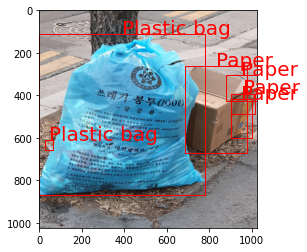

In [2]:
print_bbox(2017)